# Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.

The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

1)	Determine the states that are generating the highest revenues and

2)	Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.


# Step 0: Import libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Step 1: Load Data

In [33]:
df=pd.read_csv('Sales_Analysis.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-20,Morning,WA,Kids,8,20000
1,1-Oct-20,Morning,WA,Men,8,20000
2,1-Oct-20,Morning,WA,Women,4,10000
3,1-Oct-20,Morning,WA,Seniors,15,37500
4,1-Oct-20,Afternoon,WA,Kids,3,7500


# Step 2: Data Cleaning + Preprocessing

In [34]:
#Rename Group and Sales columns
new_column_names = {
    'Group': 'Customer_Group',
    'Sales': 'Sales_Amount',
}
df.rename(columns=new_column_names, inplace=True)

#Reame State values
state_mapping = {
    'WA': 'Western Australia',
    'NT': 'Northern Territory',
    'SA': 'South Australia',
    'VIC': 'Victoria',
    'QLD': 'Queensland',
    'NSW': 'New South Wales',
    'TAS': 'Tasmania'
}
df['State'] = df['State'].apply(lambda x: state_mapping.get(x.strip(), x))
df.head()

#Format the data
df['Time'] = df['Time'].str.title()
df['Customer_Group'] = df['Customer_Group'].str.title()
df['State'] = df['State'].str.upper()

#Data type check
df.info()
#should add date transfer code here!

#Encoding
columns=['Time','State','Customer_Group']
label_encoder = LabelEncoder()
for col in columns:
  df[f'Encoding {col}']= label_encoder.fit_transform(df[col])

#Normalization
scaler = MinMaxScaler()
#df['Sales_Amount']= scaler.fit_transform(df[['Sales_Amount']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            7560 non-null   object
 1   Time            7560 non-null   object
 2   State           7560 non-null   object
 3   Customer_Group  7560 non-null   object
 4   Unit            7560 non-null   int64 
 5   Sales_Amount    7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [39]:
#To transfor  date as time
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [ ]:
#check for duplicates rows
print("Number of duplicated rows:",df.duplicated().sum())

#Check for missing data
print("\nMissing Data: ",df.isna().sum().sum())

#Check for non-missing data
print("\nNon-Missing Data:")
print(df.notna().sum())

#Check for negative values in unit and sales
print("\nNumber of rows with negative values in 'Unit' or 'Sales': ",len(df[(df['Unit'] < 0) | (df['Sales_Amount'] < 0)]))

# Check unique values in categorical columns looking for invalid values
unique_times = df['Time'].unique()
unique_states = df['State'].unique()
unique_groups = df['Customer_Group'].unique()

print("\nunique values in categorical columns:")
print("Unique times:", df['Time'].unique())
print("Unique states:", df['State'].unique())
print("Unique groups:", df['Customer_Group'].unique())
print()

#Groupby state
sales_per_state = df.groupby('State')['Sales_Amount'].sum()
sales_per_state

In [ ]:
df.head()


# Step 3: Data Analysis

In [ ]:
df.head()

In [ ]:
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
import plotly.express as px

# Sample data
exclude_columns = ['Encoding Time', 'Encoding State','Encoding Customer_Group']
numerical_columns = df.select_dtypes(include='number').drop(exclude_columns, axis=1)
correlation_matrix = numerical_columns.corr()

# Define pastel-like colors
pastel_colors = ['#AEC6CF', '#BFDFF1', '#AFDFF3', '#B5EAD7', '#B5EAD7']

# Create an interactive heatmap using Plotly
fig_heatmap = go.Figure(go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale=pastel_colors,
    colorbar=dict(title='Correlation'),
))

fig_heatmap.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(ticks='', side='top'),
    yaxis=dict(ticks=''),
)

fig_heatmap.show()


In [ ]:
#Descriptive Analysis for Sales
sales_stat = df['Sales_Amount'].describe()
sales_stat['mode'] = df['Sales_Amount'].mode()
sales_stat['median'] = df['Sales_Amount'].median()

fig = px.box(df, y='Sales_Amount', title='Sales Distribution Analysis',
             labels={'Sales_Amount': 'Sales Amount'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
#Descriptive Analysis for Unit
sales_stat=df['Unit'].describe()
sales_stat['mode'] = df['Unit'].mode()
sales_stat['median'] = df['Unit'].median()

fig = px.box(df, y='Unit', title='Unit Distribution Analysis',
             labels={'Unit': 'Unit'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
# Group with the highest sales
group_sales_summary = df.groupby('Customer_Group')['Sales_Amount'].sum()
group_highest_sales = group_sales_summary.idxmax()
group_highest_sales_value = round(group_sales_summary.max(),2)

group_lowest_sales = group_sales_summary.idxmin()
group_lowest_sales_value = round(group_sales_summary.min(),2)

# State with the highest sales
state_sales_summary = df.groupby('State')['Sales_Amount'].sum()
state_highest_sales = state_sales_summary.idxmax()
state_highest_sales_value = round(state_sales_summary.max(),2)

state_lowest_sales = state_sales_summary.idxmin()
state_lowest_sales_value = round(state_sales_summary.min(),2)

print(f"Group generating the highest sales: {group_highest_sales} with sales amount of {group_highest_sales_value}")
print(f"Group generating the lowest sales: {group_lowest_sales} with sales amount of {group_lowest_sales_value}")
print(f"\nState generating the highest sales: {state_highest_sales} with sales amount of {state_highest_sales_value}")
print(f"State generating the lowest sales: {state_lowest_sales} with sales amount of {state_lowest_sales_value}")


In [ ]:
# Bar Plot for Group Sales
fig_group_sales = px.bar(group_sales_summary.reset_index(), x='Customer_Group', y='Sales_Amount',
                          title='Total Sales per Customer Group',
                          labels={'Customer_Group': 'Customer Group', 'Sales_Amount': 'Total Sales'},
                          color_discrete_sequence=px.colors.qualitative.Pastel)
fig_group_sales.update_layout(width=800, height=400)
fig_group_sales.show()

# Bar Plot for State Sales
fig_state_sales = px.bar(state_sales_summary.reset_index(), x='State', y='Sales_Amount',
                          title='Total Sales per State',
                          labels={'State': 'State', 'Sales_Amount': 'Total Sales'},
                          color_discrete_sequence=px.colors.qualitative.Pastel)
fig_state_sales.update_layout(width=800, height=400)
fig_state_sales.show()

In [ ]:
##check for Outliers
z_scores = stats.zscore(df['Sales_Amount'])
outliers = (z_scores > 3) | (z_scores < -3)
df = df[~outliers]
print("Number of Outliers:", outliers.sum())

In [ ]:
# Create the box plot using Plotly Express
fig = px.box(df, y='Sales_Amount', title='Sales Distribution Analysis')

# Show the chart
fig.show()

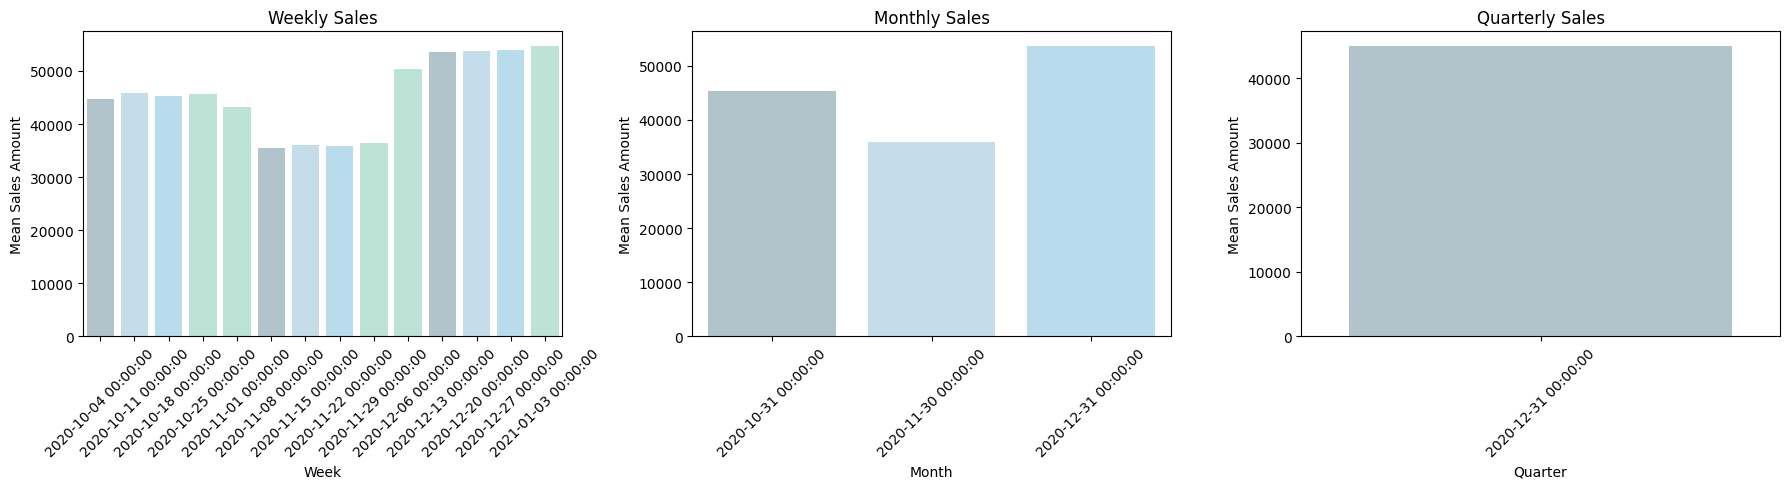

In [40]:
pastel_colors = ['#AEC6CF', '#BFDFF1', '#AFDFF3', '#B5EAD7', '#B5EAD7']

# Resample data for weekly, monthly, and quarterly means
weekly_sales = df['Sales_Amount'].resample('W').mean()
monthly_sales = df['Sales_Amount'].resample('M').mean()
quarterly_sales = df['Sales_Amount'].resample('Q').mean()

# Create subplots for each time period
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the figure size as needed

# Plot weekly data with pastel colors
sns.barplot(x=weekly_sales.index, y=weekly_sales, ax=axes[0], palette=pastel_colors)
axes[0].set_title('Weekly Sales')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Mean Sales Amount')
axes[0].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Plot monthly data with pastel colors
sns.barplot(x=monthly_sales.index, y=monthly_sales, ax=axes[1], palette=pastel_colors)
axes[1].set_title('Monthly Sales')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Mean Sales Amount')
axes[1].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Plot quarterly data with pastel colors
sns.barplot(x=quarterly_sales.index, y=quarterly_sales, ax=axes[2], palette=pastel_colors)
axes[2].set_title('Quarterly Sales')
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Mean Sales Amount')
axes[2].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


In [45]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Resample data for weekly, monthly, and quarterly means
weekly_sales = df['Sales_Amount'].resample('W').mean()
monthly_sales = df['Sales_Amount'].resample('M').mean()
quarterly_sales = df['Sales_Amount'].resample('Q').mean()

# Create subplots for each time period
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Weekly Sales', 'Monthly Sales', 'Quarterly Sales'), column_widths=[0.4, 0.4, 0.2])

# Plot weekly data
fig.add_trace(go.Bar(x=weekly_sales.index, y=weekly_sales, marker_color='#AEC6CF'), row=1, col=1)
fig.update_xaxes(title_text='Week', row=1, col=1)
fig.update_yaxes(title_text='Mean Sales Amount', row=1, col=1)

# Plot monthly data
fig.add_trace(go.Bar(x=monthly_sales.index, y=monthly_sales, marker_color='#BFDFF1'), row=1, col=2)
fig.update_xaxes(title_text='Month', row=1, col=2)
fig.update_yaxes(title_text='Mean Sales Amount', row=1, col=2)

# Plot quarterly data
fig.add_trace(go.Bar(x=quarterly_sales.index, y=quarterly_sales, marker_color='#AFDFF3'), row=1, col=3)
fig.update_xaxes(title_text='Quarter', row=1, col=3)
fig.update_yaxes(title_text='Mean Sales Amount', row=1, col=3)

fig.update_layout(height=400, width=1200, showlegend=False)



fig.show()

# Step 4: Data Visualization

In [ ]:
state_group_sales = df.groupby(['State', 'Customer_Group'])['Sales_Amount'].sum().unstack()
state_group_sales.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('State-wise Sales Analysis for Different Customer Groups')
plt.show()


In [ ]:
import plotly.express as px

# Create the state_group_sales DataFrame using pandas (if not already done)
state_group_sales = df.groupby(['State', 'Customer_Group'])['Sales_Amount'].sum().unstack()


fig = px.bar(state_group_sales, barmode='stack', title='State-wise Sales Analysis for Different Customer Groups')

# Set the x-axis labels
fig.update_xaxes(title='State')

# Set the y-axis labels
fig.update_yaxes(title='Total Sales')

# Customize colors

fig.show()


In [ ]:
Group_sales_state=df.groupby(['Customer_Group','State'])['Sales_Amount'].sum().unstack()
Group_sales_state.plot(kind='bar', stacked=True)
plt.xlabel('Customer_Group')
plt.ylabel('State')
plt.title('Group-wise Sales Analysis for Different States')
plt.show()

In [ ]:

# Create the Group_sales_state DataFrame using pandas (if not already done)
Group_sales_state = df.groupby(['Customer_Group', 'State'])['Sales_Amount'].sum().unstack()

# Create the Plotly bar chart
fig = px.bar(
    Group_sales_state,
    title='Group-wise Sales Analysis for Different States',
    labels={'State': 'Customer Group', 'value': 'Total Sales'},
)

# Update the layout for a stacked bar chart
fig.update_layout(barmode='stack')

# Show the chart
fig.show()
